In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Guardar solo los datos de 2023-2024
El dataset de mibici_viajes.csv cuenta con viajes del 2014-2024 alrededor de 25,000,000 de viajes, para hacer un uso mas practico del dataset solo se usara del 2023 al 2024, que son alrededor de 4,411,237 viajes.

##Cargar dataset original

In [ ]:
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Rutas de archivos
ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes.csv"
ruta_carpeta = "/content/drive/MyDrive/Mibici/"

# Cargar datos
#df_viajes = pd.read_csv(ruta_viajes, encoding='latin1')


##Filtrar solo viajes de 2023-2024 y guardar en drive

In [ ]:
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Rutas de archivos
ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes.csv"
ruta_carpeta = "/content/drive/MyDrive/Mibici/"

# Cargar datos
df_viajes = pd.read_csv(ruta_viajes, encoding='latin1')

# Convertir fechas a datetime
df_viajes['Inicio_del_viaje'] = pd.to_datetime(df_viajes['Inicio_del_viaje'])

# Filtrar solo viajes de 2023-2024
df_2023_2024 = df_viajes[
    (df_viajes['Inicio_del_viaje'].dt.year >= 2023) &
    (df_viajes['Inicio_del_viaje'].dt.year <= 2024)
].copy()

# Guardar el nuevo dataset
ruta_guardado = f"{ruta_carpeta}mibici_viajes_2023-2024.csv"
df_2023_2024.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')

print(f"Dataset guardado en: {ruta_guardado}")
print(f"Registros totales: {len(df_viajes)}")
print(f"Registros 2023-2024: {len(df_2023_2024)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset guardado en: /content/drive/MyDrive/Mibici/mibici_viajes_2023-2024.csv
Registros totales: 25863690
Registros 2023-2024: 4411237


# Feature engineering

##Cargar el dataset viajes del 2023 al 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_2023-2024.csv"
ruta_estaciones = "/content/drive/MyDrive/Mibici/mibici_estaciones.csv"

df_viajes = pd.read_csv(ruta_viajes, encoding='utf-8-sig')
df_estaciones = pd.read_csv(ruta_estaciones, encoding='latin1')

df_viajes.head()
df_viajes.info()
df_viajes.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411237 entries, 0 to 4411236
Data columns (total 11 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         int64 
 1   Viaje_Id           int64 
 2   Usuario_Id         int64 
 3   Genero             object
 4   Año_de_nacimiento  int64 
 5   Inicio_del_viaje   object
 6   Fin_del_viaje      object
 7   Origen_Id          int64 
 8   Destino_Id         int64 
 9   Edad               int64 
 10  Duración           object
dtypes: int64(7), object(4)
memory usage: 370.2+ MB


,Unnamed: 0,Viaje_Id,Usuario_Id,Año_de_nacimiento,Origen_Id,Destino_Id,Edad
count,4.411237e+06,4.411237e+06,4.411237e+06,4.411237e+06,4.411237e+06,4.411237e+06,4.411237e+06
mean,2.205618e+06,2.951540e+07,1.193255e+06,1.989108e+03,1.396558e+02,1.394823e+02,3.397692e+01
std,1.273415e+06,1.593009e+06,8.185869e+05,1.068194e+01,9.902041e+01,1.008069e+02,1.068446e+01
min,0.000000e+00,2.675120e+07,1.020000e+02,1.920000e+03,2.000000e+00,2.000000e+00,1.600000e+01
25%,1.102809e+06,2.812675e+07,4.453210e+05,1.984000e+03,5.100000e+01,5.100000e+01,2.600000e+01
50%,2.205618e+06,2.954199e+07,1.164650e+06,1.992000e+03,1.330000e+02,1.190000e+02,3.100000e+01
75%,3.308427e+06,3.089886e+07,2.017725e+06,1.997000e+03,2.260000e+02,2.340000e+02,3.900000e+01
max,4.411236e+06,3.224489e+07,3.353502e+06,2.007000e+03,3.880000e+02,3.880000e+02,1.040000e+02


## Feature engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from geopy.distance import geodesic

# Cargar datos
#df_viajes = pd.read_csv(ruta_viajes, encoding='utf-8-sig')
#df_estaciones = pd.read_csv(ruta_estaciones, encoding='latin1')

# Convertir fechas
df_viajes['Inicio_del_viaje'] = pd.to_datetime(df_viajes['Inicio_del_viaje'])
df_viajes['Fin_del_viaje'] = pd.to_datetime(df_viajes['Fin_del_viaje'])

# Calcular duración del viaje en minutos
df_viajes['Duracion_min'] = (df_viajes['Fin_del_viaje'] - df_viajes['Inicio_del_viaje']).dt.total_seconds() / 60

# Eliminar valores atípicos en duración (por ejemplo, viajes > 4 horas o < 1 minuto)
df_viajes = df_viajes[(df_viajes['Duracion_min'] > 1) & (df_viajes['Duracion_min'] < 240)]

# Características temporales básicas
df_viajes['Hora'] = df_viajes['Inicio_del_viaje'].dt.hour
df_viajes['Dia_semana'] = df_viajes['Inicio_del_viaje'].dt.dayofweek
df_viajes['Mes'] = df_viajes['Inicio_del_viaje'].dt.month
df_viajes['Dia_mes'] = df_viajes['Inicio_del_viaje'].dt.day
df_viajes['Es_fin_de_semana'] = (df_viajes['Dia_semana'] >= 5).astype(int)
df_viajes['Hora_pico_manana'] = df_viajes['Hora'].isin([7, 8, 9]).astype(int)
df_viajes['Hora_pico_tarde'] = df_viajes['Hora'].isin([17, 18, 19]).astype(int)

# Características temporales avanzadas
df_viajes['Hora_sin'] = np.sin(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Hora_cos'] = np.cos(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Dia_semana_sin'] = np.sin(2 * np.pi * df_viajes['Dia_semana']/7)
df_viajes['Dia_semana_cos'] = np.cos(2 * np.pi * df_viajes['Dia_semana']/7)

# Características de usuario
df_viajes['Edad'] = df_viajes['Inicio_del_viaje'].dt.year - df_viajes['Año_de_nacimiento']
df_viajes['Edad'] = df_viajes['Edad'].clip(lower=15, upper=80)  # Limitar edades razonables

# Unir con datos de estaciones para origen y destino
df_estaciones = df_estaciones.rename(columns={'id': 'Origen_Id', 'name': 'Origen_Nombre',
                                             'latitude': 'Origen_Lat', 'longitude': 'Origen_Lon'})
df_viajes = pd.merge(df_viajes, df_estaciones, on='Origen_Id', how='left')

df_estaciones = df_estaciones.rename(columns={'Origen_Id': 'Destino_Id', 'Origen_Nombre': 'Destino_Nombre',
                                             'Origen_Lat': 'Destino_Lat', 'Origen_Lon': 'Destino_Lon'})
df_viajes = pd.merge(df_viajes, df_estaciones, on='Destino_Id', how='left')

# Calcular distancia entre estaciones
def calcular_distancia(row):
    if pd.isna(row['Origen_Lat']) or pd.isna(row['Destino_Lat']):
        return np.nan
    origen = (row['Origen_Lat'], row['Origen_Lon'])
    destino = (row['Destino_Lat'], row['Destino_Lon'])
    return geodesic(origen, destino).km

df_viajes['Distancia_km'] = df_viajes.apply(calcular_distancia, axis=1)

# Características de estaciones
# Popularidad de estaciones (número de viajes que comienzan o terminan en cada estación)
origen_counts = df_viajes['Origen_Id'].value_counts().reset_index()
origen_counts.columns = ['Origen_Id', 'Origen_Popularidad']
df_viajes = pd.merge(df_viajes, origen_counts, on='Origen_Id', how='left')

destino_counts = df_viajes['Destino_Id'].value_counts().reset_index()
destino_counts.columns = ['Destino_Id', 'Destino_Popularidad']
df_viajes = pd.merge(df_viajes, destino_counts, left_on='Destino_Id', right_on='Destino_Id', how='left')

# Características de interacción
df_viajes['Misma_Estacion'] = (df_viajes['Origen_Id'] == df_viajes['Destino_Id']).astype(int)
df_viajes['Popularidad_Promedio'] = (df_viajes['Origen_Popularidad'] + df_viajes['Destino_Popularidad']) / 2

# Características agregadas por usuario
user_stats = df_viajes.groupby('Usuario_Id').agg({
    'Duracion_min': ['mean', 'std', 'count'],
    'Distancia_km': ['mean', 'std'],
    'Origen_Id': 'nunique'
}).reset_index()
user_stats.columns = ['Usuario_Id', 'User_Duracion_Media', 'User_Duracion_Std',
                     'User_Viajes_Count', 'User_Distancia_Media', 'User_Distancia_Std',
                     'User_Estaciones_Unicas']
df_viajes = pd.merge(df_viajes, user_stats, on='Usuario_Id', how='left')

# Características de vecindario
# Agrupar estaciones por área geográfica dividiendo en cuadrantes)
# Ejemplo simplificado:
df_viajes['Origen_Cuadrante'] = (df_viajes['Origen_Lat'] > df_viajes['Origen_Lat'].mean()).astype(int) * 2 + \
                                (df_viajes['Origen_Lon'] > df_viajes['Origen_Lon'].mean()).astype(int)
df_viajes['Destino_Cuadrante'] = (df_viajes['Destino_Lat'] > df_viajes['Destino_Lat'].mean()).astype(int) * 2 + \
                                 (df_viajes['Destino_Lon'] > df_viajes['Destino_Lon'].mean()).astype(int)

# Codificación de variables categóricas
le = LabelEncoder()
df_viajes['Genero_Encoded'] = le.fit_transform(df_viajes['Genero'].fillna('Desconocido'))
df_viajes['Origen_Id_Encoded'] = le.fit_transform(df_viajes['Origen_Id'])
df_viajes['Destino_Id_Encoded'] = le.fit_transform(df_viajes['Destino_Id'])

# Características de tiempo acumulado
df_viajes['Hora_Dia_Combinada'] = df_viajes['Hora'] + (df_viajes['Dia_semana'] * 24)

df_viajes.info()

<ipython-input-2-12dc0eb1dcd2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Hora'] = df_viajes['Inicio_del_viaje'].dt.hour


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4403255 entries, 0 to 4403254
Data columns (total 52 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unnamed: 0              int64         
 1   Viaje_Id                int64         
 2   Usuario_Id              int64         
 3   Genero                  object        
 4   Año_de_nacimiento       int64         
 5   Inicio_del_viaje        datetime64[ns]
 6   Fin_del_viaje           datetime64[ns]
 7   Origen_Id               int64         
 8   Destino_Id              int64         
 9   Edad                    int64         
 10  Duración                object        
 11  Duracion_min            float64       
 12  Hora                    int32         
 13  Dia_semana              int32         
 14  Mes                     int32         
 15  Dia_mes                 int32         
 16  Es_fin_de_semana        int64         
 17  Hora_pico_manana        int64         
 18  Ho

In [ ]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ajustar ancho de visualización
df_viajes.head()

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Edad,Duración,Duracion_min,Hora,Dia_semana,Mes,Dia_mes,Es_fin_de_semana,Hora_pico_manana,Hora_pico_tarde,Hora_sin,Hora_cos,Dia_semana_sin,Dia_semana_cos,Origen_Nombre,obcn_x,location_x,Origen_Lat,Origen_Lon,status_x,Destino_Nombre,obcn_y,location_y,Destino_Lat,Destino_Lon,status_y,Distancia_km,Origen_Popularidad,Destino_Popularidad,Misma_Estacion,Popularidad_Promedio,User_Duracion_Media,User_Duracion_Std,User_Viajes_Count,User_Distancia_Media,User_Distancia_Std,User_Estaciones_Unicas,Origen_Cuadrante,Destino_Cuadrante,Genero_Encoded,Origen_Id_Encoded,Destino_Id_Encoded,Hora_Dia_Combinada
0,0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42,11.700000,23,2,1,31,0,0,0,-0.258819,0.965926,0.974928,-0.222521,(GDL-022) C. San Felipe /C Enrique D. de León,GDL-022,POLÍGONO CENTRAL,20.679389,-103.359130,IN_SERVICE,(GDL-084) C. Montenegro / Av. Chapultepec,GDL-084,POLÍGONO CENTRAL,20.669306,-103.368312,IN_SERVICE,1.470191,19287,26412,0,22849.5,9.490000,4.934612,450,1.277284,0.714585,66,3,0,1,20,82,71
1,1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43,11.716667,23,2,1,31,0,0,0,-0.258819,0.965926,0.974928,-0.222521,(GDL-046) C. Emerson / Av. Vallarta,GDL-046,POLÍGONO CENTRAL,20.675014,-103.365025,IN_SERVICE,(GDL-206) C. Suiza / Av. Enrique Díaz de león,GDL-206,POLÍGONO CENTRAL,20.662310,-103.360110,IN_SERVICE,1.496833,10869,11836,0,11352.5,11.186364,11.806182,88,1.148134,0.341151,15,0,0,1,44,256,71
2,2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54,2.900000,23,2,1,31,0,0,0,-0.258819,0.965926,0.974928,-0.222521,(GDL-200) Av. Alcalde /Av. Manuel A. Camacho,GDL-200,POLÍGONO CENTRAL,20.694060,-103.348240,IN_SERVICE,(GDL-240)Hilarion Romero Gil/Gabriela Mistral,GDL-240,POLÍGONO CENTRAL,20.689988,-103.344978,IN_SERVICE,0.564522,32767,1135,0,16951.0,5.490476,3.449944,35,0.738587,0.544281,11,3,3,1,250,354,71
3,3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14,3.233333,23,2,1,31,0,0,0,-0.258819,0.965926,0.974928,-0.222521,(GDL-200) Av. Alcalde /Av. Manuel A. Camacho,GDL-200,POLÍGONO CENTRAL,20.694060,-103.348240,IN_SERVICE,(GDL-240)Hilarion Romero Gil/Gabriela Mistral,GDL-240,POLÍGONO CENTRAL,20.689988,-103.344978,IN_SERVICE,0.564522,32767,1135,0,16951.0,7.279522,8.502921,223,0.750613,0.440108,21,3,3,0,250,354,71
4,4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55,2.916667,23,2,1,31,0,0,0,-0.258819,0.965926,0.974928,-0.222521,(GDL-200) Av. Alcalde /Av. Manuel A. Camacho,GDL-200,POLÍGONO CENTRAL,20.694060,-103.348240,IN_SERVICE,(GDL-240)Hilarion Romero Gil/Gabriela Mistral,GDL-240,POLÍGONO CENTRAL,20.689988,-103.344978,IN_SERVICE,0.564522,32767,1135,0,16951.0,12.125419,6.305103,179,1.378620,0.748092,43,3,3,1,250,354,71


##Guardar en drive el nuevo dataset con Feature engineering

In [ ]:
ruta_carpeta = "/content/drive/MyDrive/Mibici/"

ruta_guardado = f"{ruta_carpeta}mibici_viajes_Feature_Engineering_2023-2024.csv"
df_viajes.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')

##Feature engineering mejorado

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from geopy.distance import geodesic

#Preprocesamiento Base

# Convertir fechas
df_viajes['Inicio_del_viaje'] = pd.to_datetime(df_viajes['Inicio_del_viaje'])
df_viajes['Fin_del_viaje'] = pd.to_datetime(df_viajes['Fin_del_viaje'])

# Calcular duración del viaje en minutos
df_viajes['Duracion_min'] = (df_viajes['Fin_del_viaje'] - df_viajes['Inicio_del_viaje']).dt.total_seconds() / 60

# Eliminar valores atípicos en duración
df_viajes = df_viajes[(df_viajes['Duracion_min'] > 1) & (df_viajes['Duracion_min'] < 240)]

#Feature Engineering

# 1. Características Temporales
df_viajes['Hora'] = df_viajes['Inicio_del_viaje'].dt.hour
df_viajes['Dia_semana'] = df_viajes['Inicio_del_viaje'].dt.dayofweek
df_viajes['Mes'] = df_viajes['Inicio_del_viaje'].dt.month
df_viajes['Es_fin_de_semana'] = (df_viajes['Dia_semana'] >= 5).astype(int)
df_viajes['Hora_pico_manana'] = df_viajes['Hora'].isin([7, 8, 9]).astype(int)
df_viajes['Hora_pico_tarde'] = df_viajes['Hora'].isin([17, 18, 19]).astype(int)

# Características cíclicas
df_viajes['Hora_sin'] = np.sin(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Hora_cos'] = np.cos(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Dia_semana_sin'] = np.sin(2 * np.pi * df_viajes['Dia_semana']/7)
df_viajes['Dia_semana_cos'] = np.cos(2 * np.pi * df_viajes['Dia_semana']/7)

# Patrones estacionales
df_viajes['Es_verano'] = df_viajes['Mes'].isin([6, 7, 8]).astype(int)
df_viajes['Es_invierno'] = df_viajes['Mes'].isin([12, 1, 2]).astype(int)

# Días festivos (lista completa para México)
festivos = [
    '2024-01-01', '2024-02-05', '2024-03-18', '2024-03-28', '2024-03-29',
    '2024-05-01', '2024-05-05', '2024-05-10', '2024-06-16', '2024-09-16',
    '2024-10-12', '2024-11-01', '2024-11-02', '2024-11-18', '2024-12-12',
    '2024-12-24', '2024-12-25', '2024-12-31'
]
df_viajes['Es_festivo'] = df_viajes['Inicio_del_viaje'].dt.date.astype(str).isin(festivos).astype(int)

#2. Características de Usuario ###
df_viajes['Edad'] = df_viajes['Inicio_del_viaje'].dt.year - df_viajes['Año_de_nacimiento']
df_viajes['Edad'] = df_viajes['Edad'].clip(lower=15, upper=80)

# Codificación de género
le = LabelEncoder()
df_viajes['Genero_Encoded'] = le.fit_transform(df_viajes['Genero'].fillna('Desconocido'))


# Convertir fechas
df_viajes['Inicio_del_viaje'] = pd.to_datetime(df_viajes['Inicio_del_viaje'])
df_viajes['Fin_del_viaje'] = pd.to_datetime(df_viajes['Fin_del_viaje'])

# Calcular duración del viaje en minutos
df_viajes['Duracion_min'] = (df_viajes['Fin_del_viaje'] - df_viajes['Inicio_del_viaje']).dt.total_seconds() / 60

# Eliminar valores atípicos en duración (por ejemplo, viajes > 4 horas o < 1 minuto)
df_viajes = df_viajes[(df_viajes['Duracion_min'] > 1) & (df_viajes['Duracion_min'] < 240)]

# Características temporales básicas
df_viajes['Hora'] = df_viajes['Inicio_del_viaje'].dt.hour
df_viajes['Dia_semana'] = df_viajes['Inicio_del_viaje'].dt.dayofweek
df_viajes['Mes'] = df_viajes['Inicio_del_viaje'].dt.month
df_viajes['Dia_mes'] = df_viajes['Inicio_del_viaje'].dt.day
df_viajes['Es_fin_de_semana'] = (df_viajes['Dia_semana'] >= 5).astype(int)
df_viajes['Hora_pico_manana'] = df_viajes['Hora'].isin([7, 8, 9]).astype(int)
df_viajes['Hora_pico_tarde'] = df_viajes['Hora'].isin([17, 18, 19]).astype(int)

# Características temporales avanzadas
df_viajes['Hora_sin'] = np.sin(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Hora_cos'] = np.cos(2 * np.pi * df_viajes['Hora']/24)
df_viajes['Dia_semana_sin'] = np.sin(2 * np.pi * df_viajes['Dia_semana']/7)
df_viajes['Dia_semana_cos'] = np.cos(2 * np.pi * df_viajes['Dia_semana']/7)

# Características de usuario
df_viajes['Edad'] = df_viajes['Inicio_del_viaje'].dt.year - df_viajes['Año_de_nacimiento']
df_viajes['Edad'] = df_viajes['Edad'].clip(lower=15, upper=80)  # Limitar edades razonables

# Unir con datos de estaciones para origen y destino
df_estaciones = df_estaciones.rename(columns={'id': 'Origen_Id', 'name': 'Origen_Nombre',
                                             'latitude': 'Origen_Lat', 'longitude': 'Origen_Lon'})
df_viajes = pd.merge(df_viajes, df_estaciones, on='Origen_Id', how='left')

df_estaciones = df_estaciones.rename(columns={'Origen_Id': 'Destino_Id', 'Origen_Nombre': 'Destino_Nombre',
                                             'Origen_Lat': 'Destino_Lat', 'Origen_Lon': 'Destino_Lon'})
df_viajes = pd.merge(df_viajes, df_estaciones, on='Destino_Id', how='left')



# Calcular distancia entre estaciones
def calcular_distancia(row):
    if pd.isna(row['Origen_Lat']) or pd.isna(row['Destino_Lat']):
        return np.nan
    origen = (row['Origen_Lat'], row['Origen_Lon'])
    destino = (row['Destino_Lat'], row['Destino_Lon'])
    return geodesic(origen, destino).km

df_viajes['Distancia_km'] = df_viajes.apply(calcular_distancia, axis=1)

#4. Transformación de Variables ###
df_viajes['Duracion_log'] = np.log1p(df_viajes['Duracion_min'])
df_viajes['Distancia_sqrt'] = np.sqrt(df_viajes['Distancia_km'])
df_viajes['Edad_cuadratica'] = df_viajes['Edad']**2

# Binning de variables
df_viajes['Duracion_bin'] = pd.cut(df_viajes['Duracion_min'], bins=[0, 5, 10, 15, 20, 30, 60, 120, 240], labels=False)
df_viajes['Distancia_bin'] = pd.cut(df_viajes['Distancia_km'], bins=[0, 0.5, 1, 1.5, 2, 3, 5, 10, 20], labels=False)

# 5. Variables de Interacción ###
df_viajes['HoraPico_Distancia'] = df_viajes['Hora_pico_manana'] * df_viajes['Distancia_km']
df_viajes['FinSemana_Edad'] = df_viajes['Es_fin_de_semana'] * df_viajes['Edad']

#6. Características de Comportamiento ###
df_viajes = df_viajes.sort_values(['Usuario_Id', 'Inicio_del_viaje'])
df_viajes['Tiempo_Desde_Ultimo'] = df_viajes.groupby('Usuario_Id')['Inicio_del_viaje'].diff().dt.total_seconds() / 3600
df_viajes['Viajes_Hoy'] = df_viajes.groupby(['Usuario_Id', df_viajes['Inicio_del_viaje'].dt.date]).cumcount()

#Resultado Final
print("Feature engineering completado. Dataset final con shape:", df_viajes.shape)
print("Columnas creadas:", df_viajes.columns.tolist())
df_viajes.head()

<ipython-input-2-82a89c63bd71>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Hora'] = df_viajes['Inicio_del_viaje'].dt.hour


Feature engineering completado. Dataset final con shape: (4403255, 49)
Columnas creadas: ['Unnamed: 0', 'Viaje_Id', 'Usuario_Id', 'Genero', 'Año_de_nacimiento', 'Inicio_del_viaje', 'Fin_del_viaje', 'Origen_Id', 'Destino_Id', 'Edad', 'Duración', 'Duracion_min', 'Hora', 'Dia_semana', 'Mes', 'Es_fin_de_semana', 'Hora_pico_manana', 'Hora_pico_tarde', 'Hora_sin', 'Hora_cos', 'Dia_semana_sin', 'Dia_semana_cos', 'Es_verano', 'Es_invierno', 'Es_festivo', 'Genero_Encoded', 'Dia_mes', 'Origen_Nombre', 'obcn_x', 'location_x', 'Origen_Lat', 'Origen_Lon', 'status_x', 'Destino_Nombre', 'obcn_y', 'location_y', 'Destino_Lat', 'Destino_Lon', 'status_y', 'Distancia_km', 'Duracion_log', 'Distancia_sqrt', 'Edad_cuadratica', 'Duracion_bin', 'Distancia_bin', 'HoraPico_Distancia', 'FinSemana_Edad', 'Tiempo_Desde_Ultimo', 'Viajes_Hoy']


,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Edad,...,Distancia_km,Duracion_log,Distancia_sqrt,Edad_cuadratica,Duracion_bin,Distancia_bin,HoraPico_Distancia,FinSemana_Edad,Tiempo_Desde_Ultimo,Viajes_Hoy
4325398,4333362,26846289,102,M,1982,2023-01-09 14:39:02,2023-01-09 14:45:02,64,62,41,...,0.768879,1.945910,0.876858,1681,1,1.0,0.000000,0,NaN,0
4323920,4331884,26847960,102,M,1982,2023-01-09 16:28:49,2023-01-09 16:34:07,50,64,41,...,0.702144,1.840550,0.837940,1681,1,1.0,0.000000,0,1.829722,1
4273482,4281432,26910314,102,M,1982,2023-01-13 15:31:05,2023-01-13 15:36:06,64,62,41,...,0.768879,1.794533,0.876858,1681,1,1.0,0.000000,0,95.037778,0
4248131,4256072,26940981,102,M,1982,2023-01-16 09:59:23,2023-01-16 10:05:58,64,75,41,...,1.099897,2.025953,1.048760,1681,1,2.0,1.099897,0,66.471667,0
4161160,4169081,27047846,102,M,1982,2023-01-23 14:24:37,2023-01-23 14:32:47,64,61,41,...,0.999102,2.215574,0.999551,1681,1,1.0,0.000000,0,172.420556,0


In [ ]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ajustar ancho de visualización
df_viajes.head()

,Unnamed: 0,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Edad,Duración,Duracion_min,Hora,Dia_semana,Mes,Es_fin_de_semana,Hora_pico_manana,Hora_pico_tarde,Hora_sin,Hora_cos,Dia_semana_sin,Dia_semana_cos,Es_verano,Es_invierno,Es_festivo,Genero_Encoded,Dia_mes,Origen_Nombre,obcn_x,location_x,Origen_Lat,Origen_Lon,status_x,Destino_Nombre,obcn_y,location_y,Destino_Lat,Destino_Lon,status_y,Distancia_km,Duracion_log,Distancia_sqrt,Edad_cuadratica,Duracion_bin,Distancia_bin,HoraPico_Distancia,FinSemana_Edad,Tiempo_Desde_Ultimo,Viajes_Hoy
4325398,4333362,26846289,102,M,1982,2023-01-09 14:39:02,2023-01-09 14:45:02,64,62,41,0 days 00:06:00,6.000000,14,0,1,0,0,0,-0.500000,-0.866025,0.000000,1.000000,0,1,0,1,9,(GDL-062) C. Libertad / C. Moscú,GDL-062,POLÍGONO CENTRAL,20.673072,-103.365055,IN_SERVICE,(GDL-060) C. Madero/ C. Camarena,GDL-060,POLÍGONO CENTRAL,20.673400,-103.357684,IN_SERVICE,0.768879,1.945910,0.876858,1681,1,1.0,0.000000,0,NaN,0
4323920,4331884,26847960,102,M,1982,2023-01-09 16:28:49,2023-01-09 16:34:07,50,64,41,0 days 00:05:18,5.300000,16,0,1,0,0,0,-0.866025,-0.500000,0.000000,1.000000,0,1,0,1,9,(GDL-048) C. Constancio Hernández/ Av. Juaréz,GDL-048,POLÍGONO CENTRAL,20.674721,-103.358548,IN_SERVICE,(GDL-062) C. Libertad / C. Moscú,GDL-062,POLÍGONO CENTRAL,20.673072,-103.365055,IN_SERVICE,0.702144,1.840550,0.837940,1681,1,1.0,0.000000,0,1.829722,1
4273482,4281432,26910314,102,M,1982,2023-01-13 15:31:05,2023-01-13 15:36:06,64,62,41,0 days 00:05:01,5.016667,15,4,1,0,0,0,-0.707107,-0.707107,-0.433884,-0.900969,0,1,0,1,13,(GDL-062) C. Libertad / C. Moscú,GDL-062,POLÍGONO CENTRAL,20.673072,-103.365055,IN_SERVICE,(GDL-060) C. Madero/ C. Camarena,GDL-060,POLÍGONO CENTRAL,20.673400,-103.357684,IN_SERVICE,0.768879,1.794533,0.876858,1681,1,1.0,0.000000,0,95.037778,0
4248131,4256072,26940981,102,M,1982,2023-01-16 09:59:23,2023-01-16 10:05:58,64,75,41,0 days 00:06:35,6.583333,9,0,1,0,1,0,0.707107,-0.707107,0.000000,1.000000,0,1,0,1,16,(GDL-062) C. Libertad / C. Moscú,GDL-062,POLÍGONO CENTRAL,20.673072,-103.365055,IN_SERVICE,(GDL-073) Av. La Paz / Av. Federalismo,GDL-073,POLÍGONO CENTRAL,20.669955,-103.355032,IN_SERVICE,1.099897,2.025953,1.048760,1681,1,2.0,1.099897,0,66.471667,0
4161160,4169081,27047846,102,M,1982,2023-01-23 14:24:37,2023-01-23 14:32:47,64,61,41,0 days 00:08:10,8.166667,14,0,1,0,0,0,-0.500000,-0.866025,0.000000,1.000000,0,1,0,1,23,(GDL-062) C. Libertad / C. Moscú,GDL-062,POLÍGONO CENTRAL,20.673072,-103.365055,IN_SERVICE,(GDL-059) C. Miguel Blanco / C. Penitenciaria,GDL-059,POLÍGONO CENTRAL,20.672231,-103.355508,IN_SERVICE,0.999102,2.215574,0.999551,1681,1,1.0,0.000000,0,172.420556,0


##Guardar nuevo dataset

In [ ]:
ruta_carpeta = "/content/drive/MyDrive/Mibici/"

# Guardar el fragmento limpio Feature Engineering /content/drive/MyDrive/Mibici/mibici_viajes_limpio_2023-01-11_a_2024-01-31_parte_1.csv
ruta_guardado = f"{ruta_carpeta}mibici_viajes_Feature_Engineering_V2_2023-2024.csv"
df_viajes.to_csv(ruta_guardado, index=False, encoding='utf-8-sig')

# Análisis Exploratorio de Datos (EDA) en fragmentos

Cargar Daraset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering_2023-2024.csv"

df_viajes = pd.read_csv(ruta_viajes, encoding='utf-8-sig')


Mounted at /content/drive


##Variables numéricas

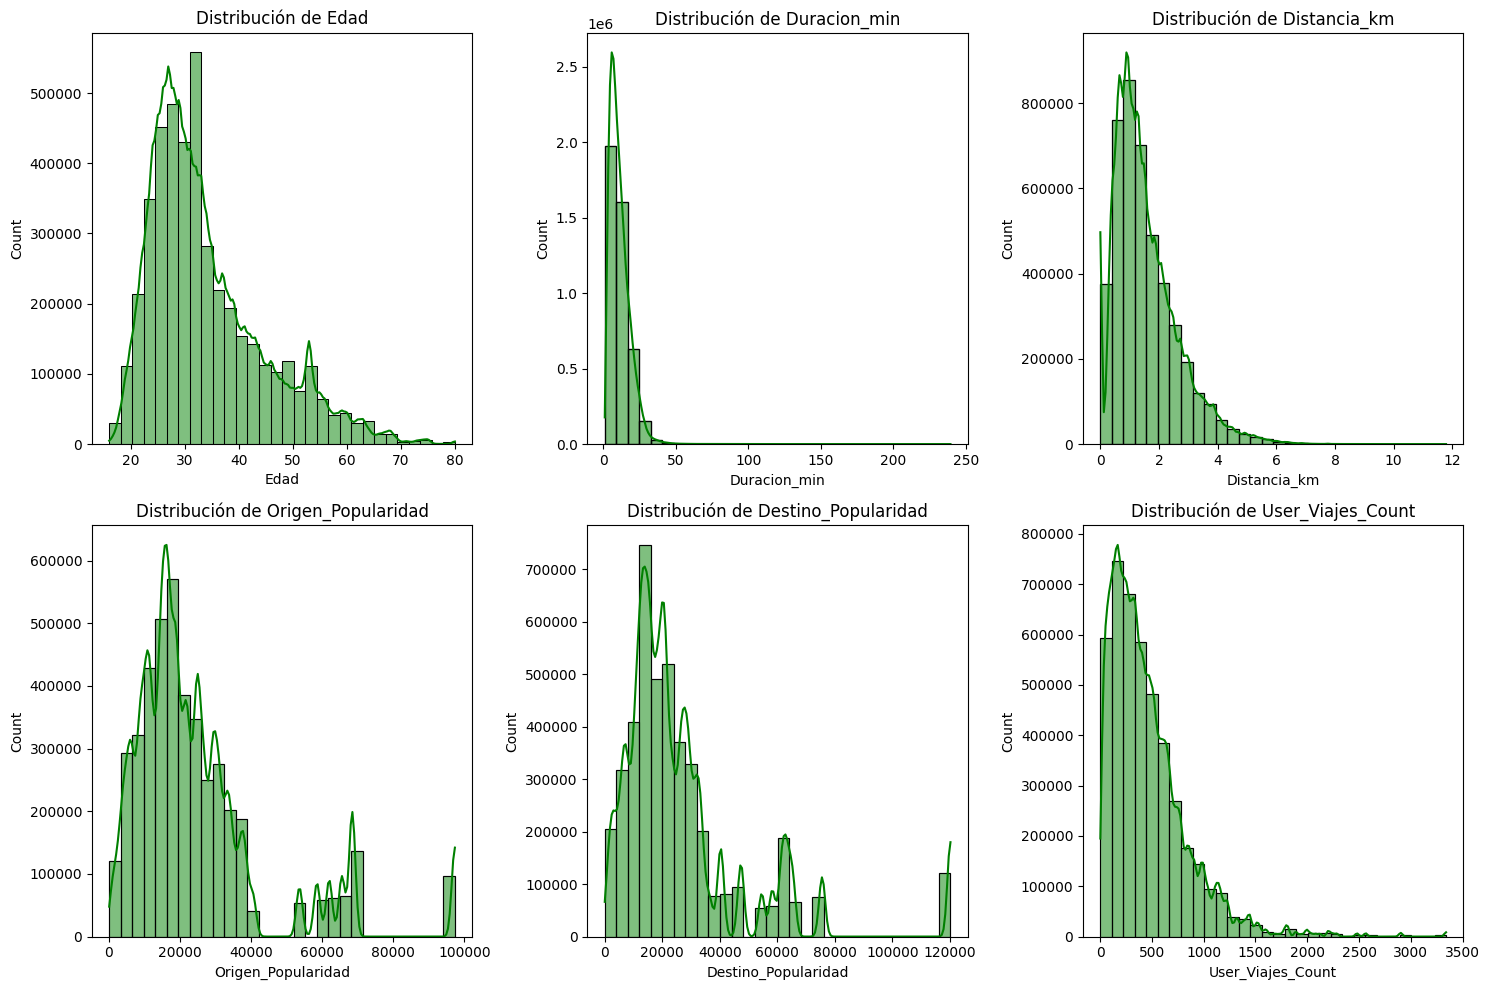

In [ ]:
# Seleccionar variables numéricas relevantes
numeric_cols = ['Edad', 'Duracion_min', 'Distancia_km', 'Origen_Popularidad',
                'Destino_Popularidad', 'User_Viajes_Count']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_viajes[col], kde=True, bins=30,color='green')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

##Variables categóricas

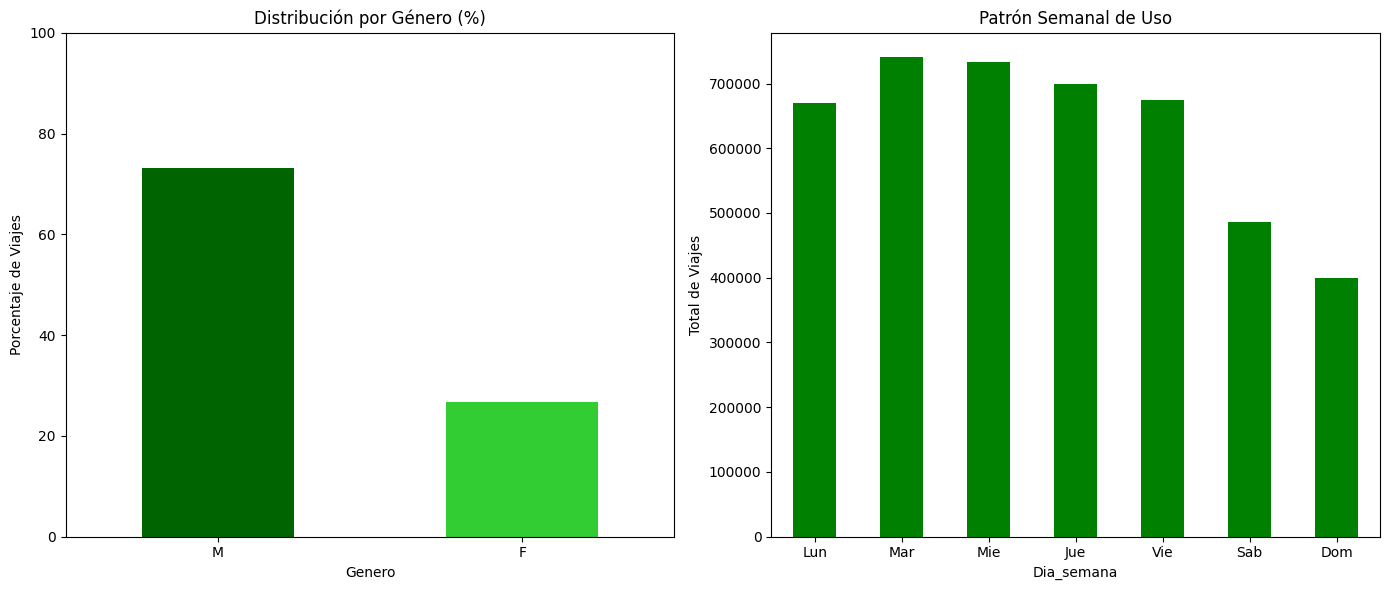

In [ ]:
plt.figure(figsize=(14, 6))

# Gráfico de género mejorado
plt.subplot(1, 2, 1)
gender_data = df_viajes['Genero'].value_counts(normalize=True).mul(100)
gender_data.plot(kind='bar', color=['darkgreen', 'limegreen', 'lightgreen'], rot=0)
plt.title('Distribución por Género (%)')
plt.ylabel('Porcentaje de Viajes')
plt.ylim(0, 100)

# Gráfico de días mejorado
plt.subplot(1, 2, 2)
weekday_data = df_viajes['Dia_semana'].value_counts().sort_index()
weekday_data.plot(kind='bar', color='green', rot=0)
plt.title('Patrón Semanal de Uso')
plt.ylabel('Total de Viajes')
plt.xticks(ticks=range(7), labels=['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])

plt.tight_layout()
plt.show()

##Análisis temporal

Text(0, 0.5, 'Número de Viajes')

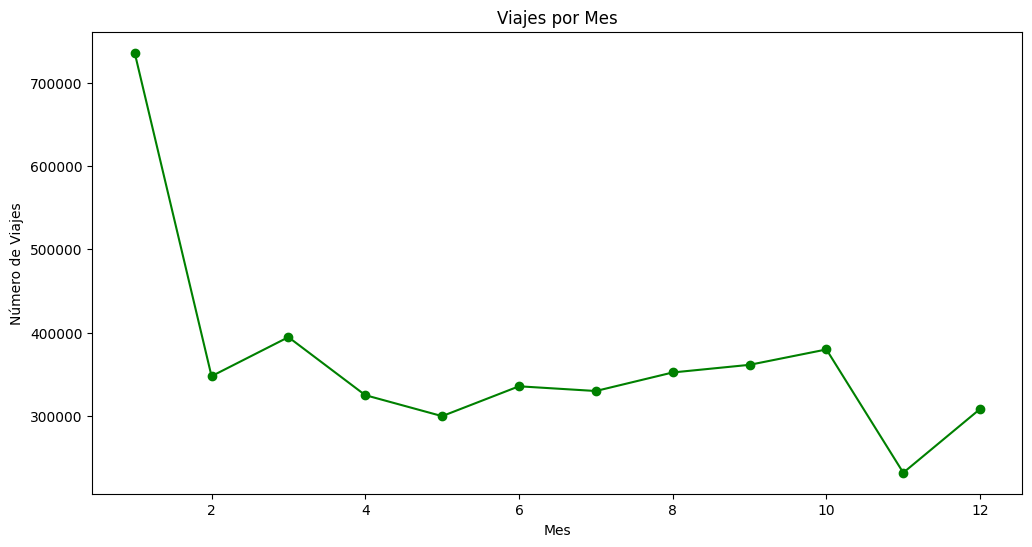

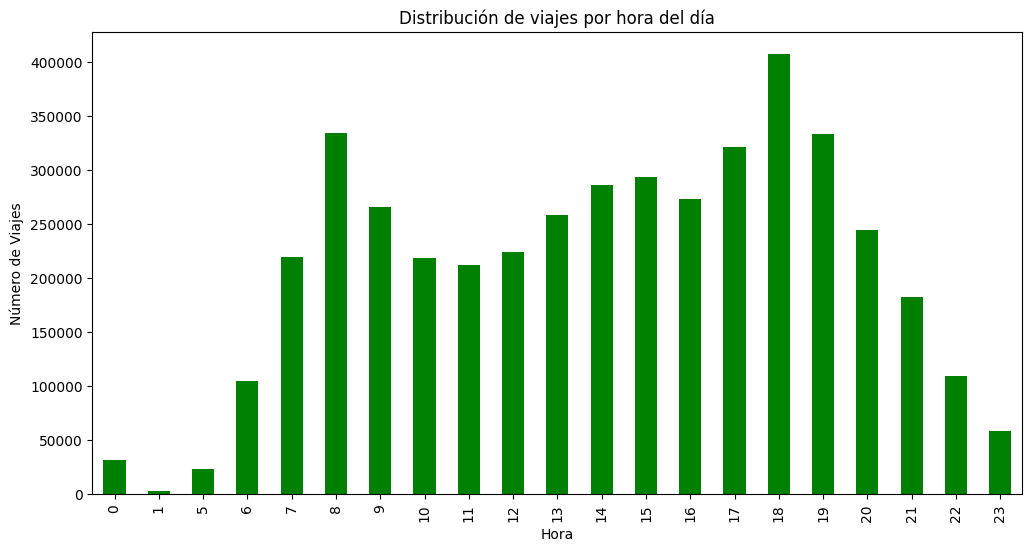

In [ ]:
  # Viajes por mes
plt.figure(figsize=(12, 6))
df_viajes.groupby('Mes')['Viaje_Id'].count().plot(kind='line', marker='o',color='green')
plt.title('Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Viajes')

# Viajes por hora del día
plt.figure(figsize=(12, 6))
df_viajes['Hora'].value_counts().sort_index().plot(kind='bar',color='green')
plt.title('Distribución de viajes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Número de Viajes')

##Análisis bivariado

(0.0, 24.23333333333333)

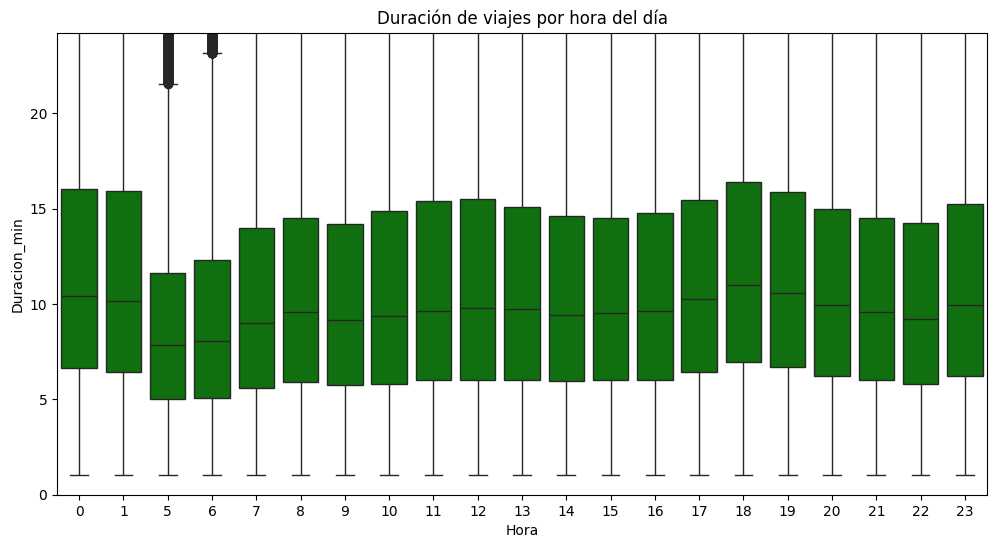

In [ ]:
# Duración vs Hora del día
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hora', y='Duracion_min', data=df_viajes,color='green')
plt.title('Duración de viajes por hora del día')
plt.ylim(0, df_viajes['Duracion_min'].quantile(0.95))  # Eliminar outliers extremos

##Análisis geográfico

Text(0.5, 0, 'Número de Viajes')

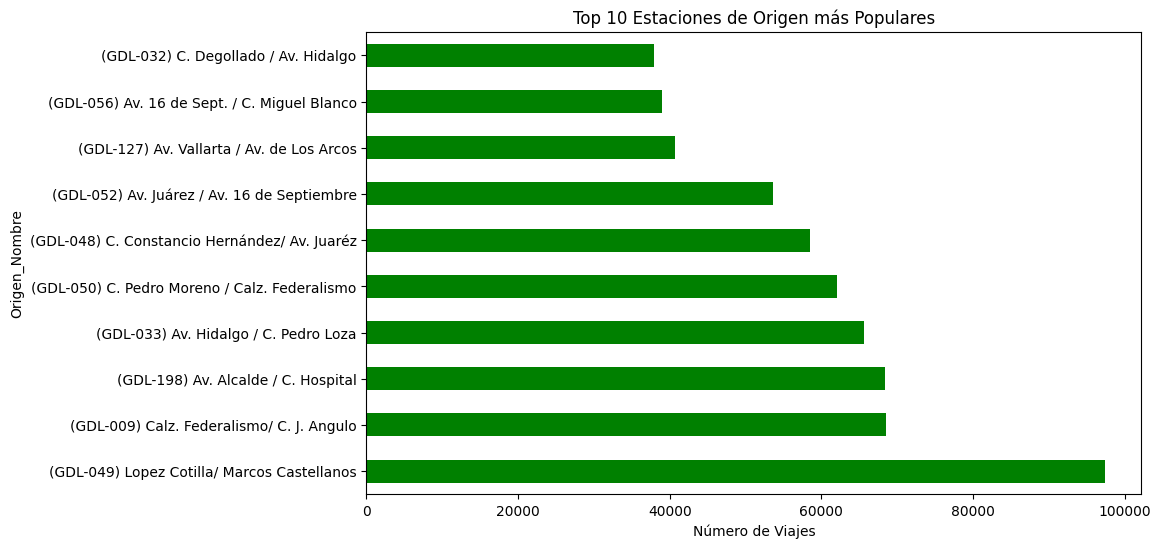

In [ ]:
# Top 10 estaciones más populares
top_origen = df_viajes['Origen_Nombre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_origen.plot(kind='barh',color='green')
plt.title('Top 10 Estaciones de Origen más Populares')
plt.xlabel('Número de Viajes')

Text(0.5, 0, 'Número de Viajes')

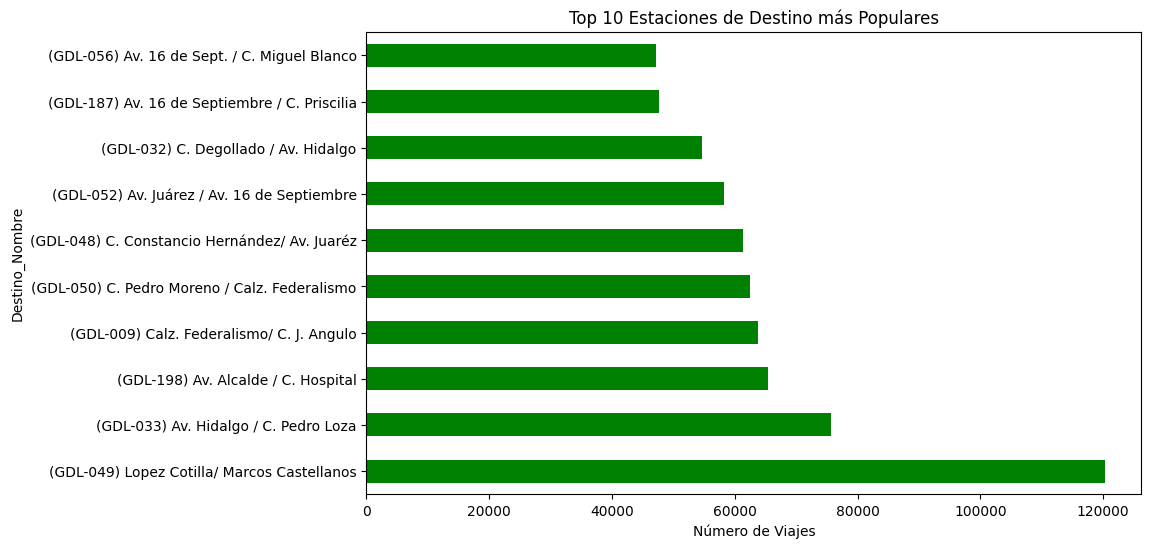

In [ ]:
# Top 10 estaciones más populares
top_origen = df_viajes['Destino_Nombre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_origen.plot(kind='barh',color='green')
plt.title('Top 10 Estaciones de Destino más Populares')
plt.xlabel('Número de Viajes')

##Análisis de usuarios

Segmento_Usuario
Super usuario (101-500)    2335500
Elite (500+)               1554625
Muy frecuente (51-100)      303470
Frecuente (21-50)           152405
Regular (6-20)               51318
Ocasional (1-5)               5937
Name: count, dtype: int64


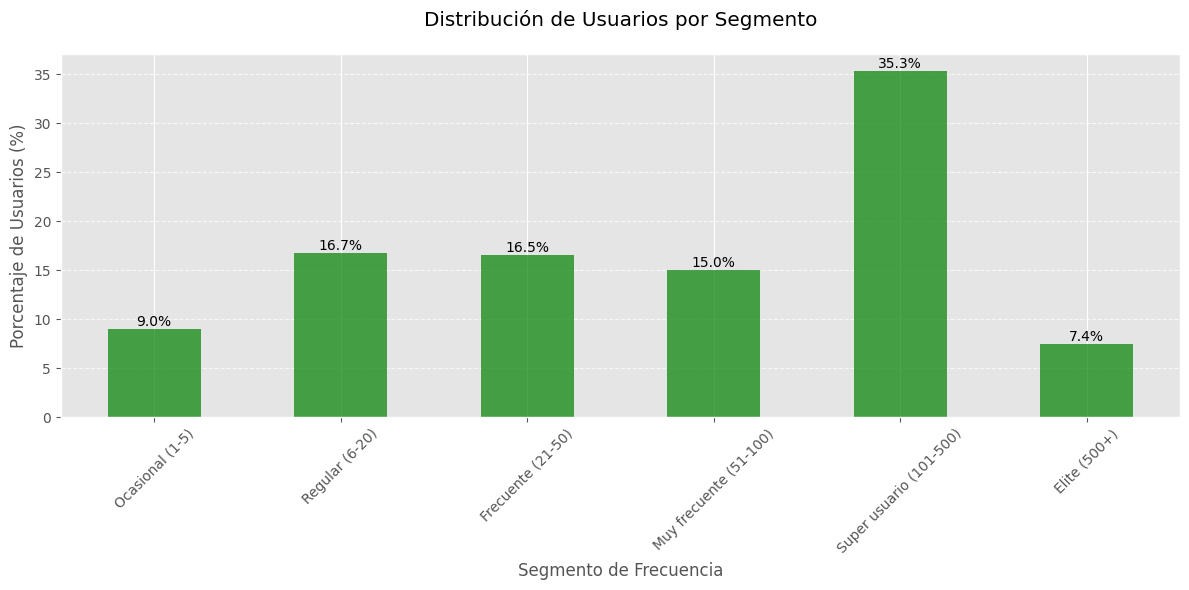

In [ ]:
# Definición corregida de bins y labels
bins = [0, 5, 20, 50, 100, 500, float('inf')]  # 7 bordes → 6 intervalos
labels = ['Ocasional (1-5)', 'Regular (6-20)', 'Frecuente (21-50)',
          'Muy frecuente (51-100)', 'Super usuario (101-500)', 'Elite (500+)']  # 6 etiquetas

# Crear la segmentación corregida
df_viajes['Segmento_Usuario'] = pd.cut(df_viajes['User_Viajes_Count'],
                                       bins=bins,
                                       labels=labels,
                                       right=False)  # right=False para que el límite inferior esté incluido

# Verificar la distribución
print(df_viajes['Segmento_Usuario'].value_counts())

# Visualización mejorada
plt.figure(figsize=(12, 6))
segment_dist = df_viajes.drop_duplicates('Usuario_Id')['Segmento_Usuario'].value_counts(normalize=True).mul(100)

ax = segment_dist.sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribución de Usuarios por Segmento', pad=20)
plt.ylabel('Porcentaje de Usuarios (%)')
plt.xlabel('Segmento de Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de porcentaje
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


##Correlaciones

Text(0.5, 1.0, 'Matriz de Correlación')

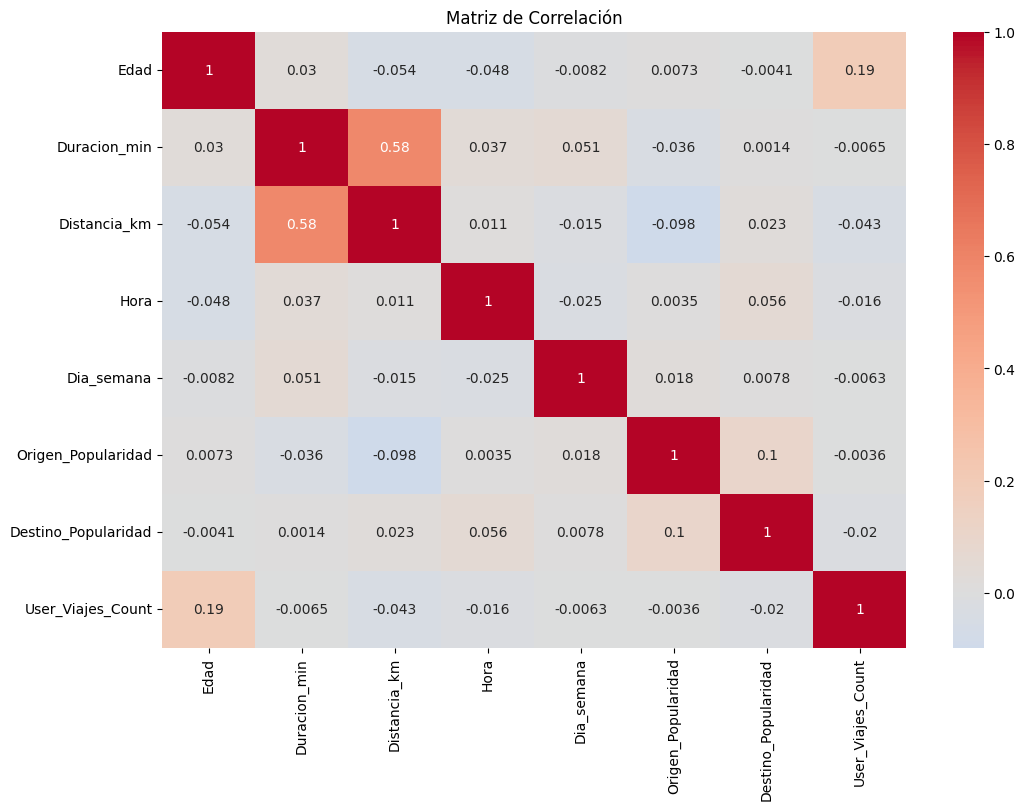

In [ ]:
# Matriz de correlación
corr_cols = ['Edad', 'Duracion_min', 'Distancia_km', 'Hora', 'Dia_semana',
             'Origen_Popularidad', 'Destino_Popularidad', 'User_Viajes_Count']

plt.figure(figsize=(12, 8))
sns.heatmap(df_viajes[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

# Implementación de modelos

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

#ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering.csv"

ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering_2023-2024.csv"

#ruta_estaciones = "/content/drive/MyDrive/Mibici/mibici_estaciones.csv"

df = pd.read_csv(ruta_viajes, encoding='utf-8-sig')
#df_estaciones = pd.read_csv(ruta_estaciones, encoding='latin1')

df.head()
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Regresión

###SARIMA para el Pronóstico de Demanda en Estaciones
SARIMA (Seasonal ARIMA) es un modelo para series de tiempo que nos permitirá predecir la demanda de bicicletas en una estación a lo largo del tiempo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

####Preparar datos para SARIMA

In [ ]:
# Convertir a datetime y extraer componentes
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df['Hora'] = df['Inicio_del_viaje'].dt.hour

# Filtrar para la estación 35 y crear serie temporal
estacion_ejemplo = 35
serie_temporal = df[df['Origen_Id'] == estacion_ejemplo].groupby(
    pd.Grouper(key='Inicio_del_viaje', freq='h')
)['Viaje_Id'].count()

# Completar horas faltantes
serie_completa = serie_temporal.asfreq('h').fillna(0)

####Análisis exploratorio

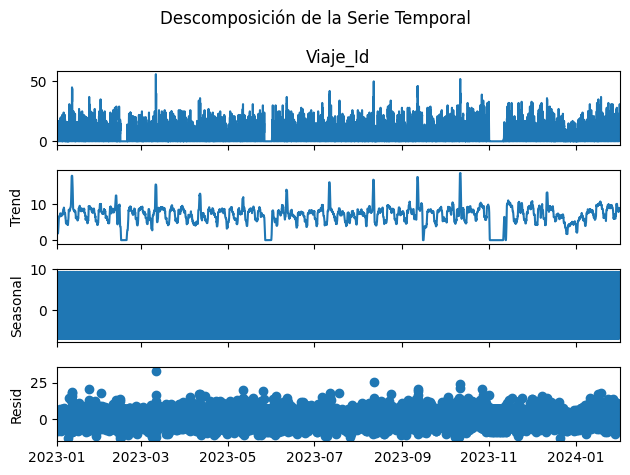

In [ ]:
decomposicion = seasonal_decompose(serie_completa, model='additive', period=24)
decomposicion.plot()
plt.suptitle('Descomposición de la Serie Temporal')
plt.tight_layout()
plt.show()

####División de datos (última semana para test)

In [ ]:
train = serie_completa.iloc[:-168]  # 168 horas = 7 días
test = serie_completa.iloc[-168:]

####Modelado SARIMA

In [ ]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)  # Estacionalidad diaria (24 horas)

model = SARIMAX(train,
               order=order,
               seasonal_order=seasonal_order,
               enforce_stationarity=False,
               enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Viaje_Id   No. Observations:                 9336
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -25648.657
Date:                            Thu, 03 Apr 2025   AIC                          51307.314
Time:                                    04:52:59   BIC                          51342.994
Sample:                                01-01-2023   HQIC                         51319.436
                                     - 01-24-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1293      0.013      9.741      0.000       0.103       0.155
ma.L1         -0.6861      0.010   

#### Predicción y evaluación

In [ ]:
prediccion = results.get_forecast(steps=168)
pred_media = prediccion.predicted_mean
pred_intervalo = prediccion.conf_int()

####Visualización

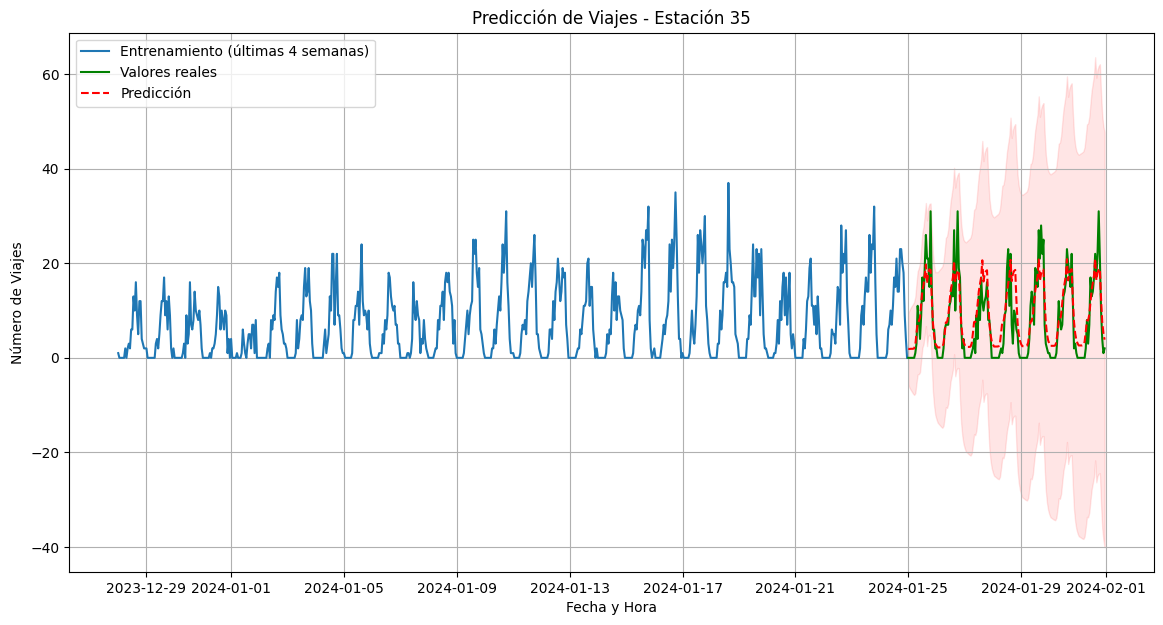

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(train.index[-672:], train[-672:], label='Entrenamiento (últimas 4 semanas)')
plt.plot(test.index, test, label='Valores reales', color='green')
plt.plot(pred_media.index, pred_media, label='Predicción', color='red', linestyle='--')
plt.fill_between(pred_intervalo.index,
                pred_intervalo.iloc[:, 0],
                pred_intervalo.iloc[:, 1], color='red', alpha=0.1)
plt.title(f'Predicción de Viajes - Estación {estacion_ejemplo}')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Viajes')
plt.legend()
plt.grid(True)
plt.show()

#### Métricas de evaluación

In [ ]:
mae = mean_absolute_error(test, pred_media)
rmse = np.sqrt(mean_squared_error(test, pred_media))

print(f'\nMétricas de Error:')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


Métricas de Error:
MAE: 3.24
RMSE: 4.11


##Clasificación

###Árbol de Decisión

*   Árbol de Decisión para Predicción de Renovación





####Cargar Librerias y dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

####Preparacion de datos

In [ ]:
##Preparación de datos
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df_reciente = df[df['Inicio_del_viaje'] >= '2023-01-01'].copy()

# Crear dataset de usuarios
df_usuarios = df_reciente.groupby('Usuario_Id').agg({
    'Inicio_del_viaje': ['min', 'max'],
    'Duracion_min': 'mean',
    'Viaje_Id': 'count',
    'Genero_Encoded': 'first',
    'Edad': 'first',
    'Es_fin_de_semana': 'mean',
    'Distancia_km': 'mean'
})

# Renombrar columnas
df_usuarios.columns = [
    'Primer_viaje', 'Ultimo_viaje', 'Duracion_promedio',
    'Frecuencia_viajes', 'Genero', 'Edad',
    'Pct_fin_semana', 'Distancia_promedio'
]

# Definir renovación (actividad > 6 meses)
df_usuarios['Dias_membresia'] = (df_usuarios['Ultimo_viaje'] - df_usuarios['Primer_viaje']).dt.days
df_usuarios['Renovacion'] = (df_usuarios['Dias_membresia'] > 180).astype(int)

## 2. Selección de características ##
features = [
    'Frecuencia_viajes', 'Duracion_promedio', 'Edad', 'Genero',
    'Pct_fin_semana', 'Distancia_promedio'
]

X = df_usuarios[features].fillna(0)
y = df_usuarios['Renovacion']

#División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

####Entrenamiento del Árbol de Decisión

In [ ]:
# Configuración inicial
modelo_arbol = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)

modelo_arbol.fit(X_train, y_train)

####Evaluacion

In [ ]:
y_pred = modelo_arbol.predict(X_test)
y_proba = modelo_arbol.predict_proba(X_test)[:, 1]

print("\n=== Métricas del Árbol de Decisión ===")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
plt.title("Árbol de Decisión para Predicción de Renovación")
plt.show()

####Matriz de confusion

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Renovó', 'Renovó'],
            yticklabels=['No Renovó', 'Renovó'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

####Visualizacion del arbol

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    modelo_arbol,
    feature_names=features,
    class_names=['No Renovó', 'Renovó'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)

####Interpretación de reglas

In [ ]:
print("\nReglas clave de decisión:")
for i, (feature, importance) in enumerate(zip(features, modelo_arbol.feature_importances_)):
    print(f"{i+1}. {feature}: {importance:.3f}")

####Interpretación para un caso

In [ ]:
usuario_ejemplo = X_test.iloc[0:1]
print("\nEjemplo de predicción:")
print(f"Características: {usuario_ejemplo.to_dict('records')[0]}")
print(f"Predicción: {'Renovará' if y_pred[0] == 1 else 'No renovará'}")
print(f"Probabilidad: {y_proba[0]:.1%}")

###Arbol de desicion (mejorando el balance)

#### Carga y preparación de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga y preparación de datos
print("=== CARGA DE DATOS ===")
df = pd.read_csv('tu_archivo.csv')  # Asegúrate de cargar tus datos reales aquí
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'])
df_reciente = df[df['Inicio_del_viaje'] >= '2023-01-01'].copy()

#### Creación de dataset de usuarios

In [ ]:
df_usuarios = df_reciente.groupby('Usuario_Id').agg({
    'Inicio_del_viaje': ['min', 'max'],
    'Duracion_min': 'mean',
    'Viaje_Id': 'count',
    'Genero_Encoded': 'first',
    'Edad': 'first',
    'Es_fin_de_semana': 'mean',
    'Distancia_km': 'mean',
    'Hora_pico_manana': 'mean',
    'Hora_pico_tarde': 'mean'
}).reset_index()

# Renombrar columnas
df_usuarios.columns = [
    'Usuario_Id', 'Primer_viaje', 'Ultimo_viaje', 'Duracion_promedio',
    'Frecuencia_viajes', 'Genero', 'Edad', 'Pct_fin_semana',
    'Distancia_promedio', 'Uso_hora_pico_manana', 'Uso_hora_pico_tarde'
]


####Feature Engineering Avanzado

In [ ]:
print("\n=== CREACIÓN DE VARIABLES ===")
df_usuarios['Dias_membresia'] = (df_usuarios['Ultimo_viaje'] - df_usuarios['Primer_viaje']).dt.days
df_usuarios['Inactividad_reciente'] = (pd.to_datetime('today') - df_usuarios['Ultimo_viaje']).dt.days
df_usuarios['Renovacion'] = (df_usuarios['Dias_membresia'] > 180).astype(int)

# Variables mejoradas
df_usuarios['Frecuencia_norm'] = np.log1p(df_usuarios['Frecuencia_viajes']) / (df_usuarios['Dias_membresia']/90 + 1)
df_usuarios['Inactividad_ponderada'] = np.sqrt(df_usuarios['Inactividad_reciente']) / df_usuarios['Frecuencia_viajes'].replace(0, 1)

# Nuevas variables propuestas
df_usuarios['Consistencia'] = 1 / (1 + df_usuarios['Inactividad_reciente']/df_usuarios['Frecuencia_viajes'])
df_usuarios['Valor_cliente'] = np.log1p(df_usuarios['Frecuencia_viajes'] * df_usuarios['Distancia_promedio'])
df_usuarios['Ratio_fin_semana'] = df_usuarios['Pct_fin_semana'] / (1 - df_usuarios['Pct_fin_semana'] + 0.01)
df_usuarios['Frec_x_Distancia'] = df_usuarios['Frecuencia_norm'] * np.log1p(df_usuarios['Distancia_promedio'])

# Nueva variable compuesta para mejorar el balance
df_usuarios['Engagement_compuesto'] = (
    0.5 * df_usuarios['Consistencia'] +
    0.3 * df_usuarios['Frecuencia_norm'] +
    0.2 * df_usuarios['Valor_cliente']
)

# Segmentación mejorada
bins = [0, 5, 15, 30, np.inf]
labels = ['Ocasional', 'Regular', 'Frecuente', 'Superusuario']
df_usuarios['Segmento'] = pd.cut(df_usuarios['Frecuencia_viajes'], bins=bins, labels=labels)


####Selección de características

In [ ]:
features = [
    'Engagement_compuesto',
    'Consistencia',
    'Frecuencia_norm',
    'Frec_x_Distancia',
    'Valor_cliente',
    'Ratio_fin_semana',
    'Segmento'
]

X = pd.get_dummies(df_usuarios[features], columns=['Segmento'])
y = df_usuarios['Renovacion']

####División de datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Modelado con parámetros

In [ ]:
modelo_final = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    min_weight_fraction_leaf=0.03,
    max_features='sqrt',
    random_state=42
)

modelo_final.fit(X_train, y_train)


####Evaluación

In [ ]:
print("\n=== EVALUACIÓN DEL MODELO ===")
y_pred = modelo_final.predict(X_test)
print(classification_report(y_test, y_pred))

# Importancia de características en formato de tabla
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelo_final.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportancia de características optimizadas:")
print(feature_imp.to_string(index=False))


####Visualización de importancia de features

In [ ]:
plt.figure(figsize=(10,6))
feature_imp.sort_values('Importance').plot.barh(x='Feature', y='Importance', legend=False)
plt.title("Importancia de Features Optimizada")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

#### Visualización del árbol

In [ ]:
plt.figure(figsize=(24, 12))
plot_tree(
    modelo_final,
    feature_names=X.columns,
    class_names=['No Renovó', 'Renovó'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=6
)
plt.title("Árbol de Decisión Optimizado - Primeros 3 niveles")
plt.show()

####Análisis de segmentos

In [ ]:
print("\n=== ANÁLISIS POR SEGMENTOS ===")
print("Distribución de usuarios por segmento:")
print(df_usuarios['Segmento'].value_counts())

print("\nTasa de renovación por segmento:")
print(df_usuarios.groupby('Segmento')['Renovacion'].mean())


####Matriz de correlación mejorada

In [ ]:
print("\n=== MATRIZ DE CORRELACIÓN ===")
columnas_numericas = df_usuarios.select_dtypes(include=['int64', 'float64']).columns
columnas_excluir = ['Usuario_Id', 'Genero', 'Renovacion']
columnas_analisis = [col for col in columnas_numericas if col not in columnas_excluir]

plt.figure(figsize=(14, 10))
corr_matrix = df_usuarios[columnas_analisis].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.tight_layout()
plt.show()

####Exportar datos para verificación

In [ ]:
df_usuarios.to_csv('datos_usuarios_optimizados.csv', index=False)
print("\nDatos exportados a 'datos_usuarios_optimizados.csv'")

##Agrupamiento


###Clasificación de estaciones según su nivel de uso (K-Means)

####Cargar datos y librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar datos

ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering_2023-2024.csv"
ruta_estaciones = "/content/drive/MyDrive/Mibici/mibici_estaciones.csv"

df = pd.read_csv(ruta_viajes, encoding='utf-8-sig')
df_estaciones = pd.read_csv(ruta_estaciones, encoding='latin1')

#### Análisis de popularidad de estaciones

In [ ]:
estaciones_stats = df.groupby('Origen_Id').agg({
    'Origen_Popularidad': 'first',
    'Origen_Lat': 'first',
    'Origen_Lon': 'first',
    'Origen_Nombre': 'first'
}).reset_index()


####Preparación de características para clustering

In [ ]:
X = estaciones_stats[['Origen_Popularidad']].copy()

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####Determinación del número óptimo de clusters

In [ ]:
wcss = []
silhouette_scores = []
possible_k_values = range(2, 6)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

#### Gráfico del método del codo

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, wcss, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo')

####Gráfico de silhouette

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Análisis Silhouette')
plt.tight_layout()
plt.show()


####Aplicación de K-Means

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
estaciones_stats['Cluster'] = kmeans.fit_predict(X_scaled)


####Asignación de etiquetas a los clusters

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = np.argsort(cluster_centers[:, 0])

label_map = {
    cluster_order[0]: "Baja demanda",
    cluster_order[1]: "Media demanda",
    cluster_order[2]: "Alta demanda"
}
estaciones_stats['Nivel_demanda'] = estaciones_stats['Cluster'].map(label_map)


####Visualización de resultados

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma de distribución
plt.subplot(1, 2, 1)
sns.histplot(data=estaciones_stats, x='Origen_Popularidad', hue='Nivel_demanda',
             bins=30, kde=True, palette='viridis')
plt.title('Distribución de Popularidad por Nivel de Demanda')
plt.xlabel('Popularidad de la Estación')
plt.ylabel('Frecuencia')

# Boxplot por cluster
plt.subplot(1, 2, 2)
sns.boxplot(data=estaciones_stats, y='Origen_Popularidad', x='Nivel_demanda',
            palette='viridis', order=["Baja demanda", "Media demanda", "Alta demanda"])
plt.title('Distribución de Popularidad por Nivel de Demanda')
plt.ylabel('Popularidad de la Estación')
plt.xlabel('Nivel de Demanda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mapa de calor geográfico
plt.figure(figsize=(10, 8))
sns.scatterplot(data=estaciones_stats, x='Origen_Lon', y='Origen_Lat',
                hue='Nivel_demanda', palette='viridis', size='Origen_Popularidad',
                sizes=(20, 200), alpha=0.7)
plt.title('Mapa de Calor de Estaciones por Nivel de Demanda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


####Resultados estadísticos

In [ ]:
print("\nResumen estadístico por nivel de demanda:")
print(estaciones_stats.groupby('Nivel_demanda')['Origen_Popularidad'].describe())

print("\nConteo de estaciones por nivel de demanda:")
print(estaciones_stats['Nivel_demanda'].value_counts())

#### Exportar resultados

In [ ]:
estaciones_stats.to_csv('/content/drive/MyDrive/Mibici/estaciones_clasificadas.csv', index=False)



####Calculando distancias promedio entre estaciones

*   Vecinos más cercanos (k-NN),
*   BallTree: útil con datos geográficos.



####Librerias y carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering.csv"

ruta_viajes = "/content/drive/MyDrive/Mibici/mibici_viajes_Feature_Engineering_V2_2023-2024.csv"

ruta_estaciones = "/content/drive/MyDrive/Mibici/mibici_estaciones.csv"

df = pd.read_csv(ruta_viajes, encoding='utf-8-sig')
df_estaciones = pd.read_csv(ruta_estaciones, encoding='latin1')

df.head()
df.info()

####Preparación de características

In [ ]:
#Preprocesamiento eficiente
# Tomar solo las estaciones únicas
estaciones = df[['Origen_Id', 'Origen_Lat', 'Origen_Lon', 'Origen_Nombre']].drop_duplicates()

# Verificar formato de coordenadas
print("Ejemplo de coordenadas:", estaciones[['Origen_Lat', 'Origen_Lon']].head(2))

# Convertir a numpy array (asegurando que sean float)
coords = estaciones[['Origen_Lat', 'Origen_Lon']].astype(float).values


####Cálculo eficiente con BallTree (para datos geográficos)

In [ ]:
# Convertir a radianes para métrica haversine
coords_rad = np.radians(coords)
tree = BallTree(coords_rad, metric='haversine')  # 5-10x más rápido que NearestNeighbors

# Calcular distancias (k=6 porque incluye el punto mismo)
distances, indices = tree.query(coords_rad, k=6)  # Radio terrestre ~6371 km

# Ignorar la distancia a sí mismo (la primera columna)
distances = distances[:, 1:] * 6371   # Convertir a km

####Calcular métricas

In [ ]:
estaciones['Densidad_Estaciones'] = distances.mean(axis=1)
estaciones['Estaciones_Cercanas'] = distances.std(axis=1)


####Visualización

In [ ]:
plt.figure(figsize=(15, 12))
scatter = plt.scatter(
    estaciones['Origen_Lon'],
    estaciones['Origen_Lat'],
    c=estaciones['Densidad_Estaciones'],
    cmap='plasma',
    s=50,
    vmin=0.1,  # Límite inferior para mejor contraste
    vmax=2.0    # Límite superior basado en datos reales
)

plt.colorbar(scatter, label='Distancia promedio a 5 vecinos (km)')
plt.title('Densidad de Estaciones MiBici en Guadalajara', pad=20)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(alpha=0.3)

#### Coordenadas de ubicaciones importantes en Guadalajara

In [ ]:

ubicaciones = {
    "Centro Histórico": (-103.3915, 20.6668),
    "La Minerva": (-103.3918, 20.6736),
    "Plaza del Sol": (-103.4070, 20.6506),
    "Expo Guadalajara": (-103.3910, 20.6534),
    "Teatro Degollado": (-103.3507, 20.6670),
    "Plaza de Armas": (-103.3525, 20.6665),
    "Instituto Cultural Cabañas": (-103.3581, 20.6645),
    "Palacio de Gobierno": (-103.3481, 20.6669),
    "Catedral Metropolitana de Guadalajara": (-103.3487, 20.6663),
    "Parque Revolución": (-103.3545, 20.6692),
    "Parque Expiatorio": (-103.3589, 20.6751),
    "La Glorieta de la Normal": (-103.3597, 20.6717),
    "Parque Alcalde": (-103.3853, 20.6637)
}

In [ ]:
for nombre, (longitud, latitud) in ubicaciones.items():
    plt.scatter(longitud, latitud, s=100, marker='*', label=nombre)

# Agregar leyenda
plt.legend()
plt.show()


####Resultados relevantes

In [ ]:
print("\nTop 10 estaciones más aisladas:")
print(estaciones.nlargest(10, 'Densidad_Estaciones')[['Origen_Nombre', 'Densidad_Estaciones']].to_string(index=False))

print("\nTop 10 estaciones más centrales:")
print(estaciones.nsmallest(10, 'Densidad_Estaciones')[['Origen_Nombre', 'Densidad_Estaciones']].to_string(index=False))